# Earth Engine in Jupyter Notebook Demonstration

From: 

https://developers.google.com/earth-engine/python_install-colab

### Import the API
Run the following cell to import the API into your session.

In [1]:
import ee

### Authenticate and initialise
Run the `ee.Authenticate` function to authenticate your access to Earth Engine servers and `ee.Initialize` to initialize it. Add a code cell, enter the following lines, and run the cell.

In [2]:
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

Enter verification code:  4/0AF6tldw-9ANXLhSlJ9VLQuRt113SIl2aYfP-kqO8gcyvC56v7xUyFY



Successfully saved authorization token.


You'll be asked to authorize access to your Earth Engine account. Follow the instructions printed to the cell to complete this step.

### Test the API
Test the API by printing the elevation of Mount Everest. Note that before using the API you must initialize it. Run the following Python script in a new cell.

In [3]:
# Print the elevation of Mount Everest.
dem = ee.Image('USGS/SRTMGL1_003')
xy = ee.Geometry.Point([86.9250, 27.9881])
elev = dem.sample(xy, 30).first().get('elevation').getInfo()
print('Mount Everest elevation (m):', elev)

Mount Everest elevation (m): 8729


### Map visualisation
`ee.Image` objects can be displayed to notebook output cells. The following two examples demonstrate displaying a static image and an interactive map.

#### Static image
The `IPython.display` module contains the Image function, which can display the results of a URL representing an image generated from a call to the Earth Engine `getThumbUrl` function. The following script will display a thumbnail of a global elevation model.

In [4]:
# Import libraries.
import ee
from IPython.display import Image

# # Trigger the authentication flow.
# ee.Authenticate()

# # Initialize the library.
# ee.Initialize()

# Import a DEM and display a thumbnail of it.
dem = ee.Image('USGS/SRTMGL1_003')
Image(url=dem.updateMask(dem.gt(0))
  .getThumbUrl({'min': 0, 'max': 4000, 'dimensions': 512,
                'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}))

#### Interactive map
The `folium` package can be used to display `ee.Imag`e objects on an interactive Leaflet map. Folium has no default method for handling tiles from Earth Engine, so one must be defined and added to the `folium.Map` module before use.

The following script provides an example of adding a method for handing Earth Engine tiles and using it to display an elevation model to a Leaflet map.

In [5]:
# Import libraries.
import ee
import folium

# # Trigger the authentication flow.
# ee.Authenticate()

# # Initialize the library.
# ee.Initialize()

# Define a method for displaying Earth Engine image tiles to folium map.
def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
    tiles = map_id_dict['tile_fetcher'].url_format,
    attr = "Map Data © Google Earth Engine",
    name = name,
    overlay = True,
    control = True
  ).add_to(self)

# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

# Fetch an elevation model.
dem = ee.Image('USGS/SRTMGL1_003')
# Set visualization parameters.
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Create a folium map object.
my_map = folium.Map(location=[20, 0], zoom_start=3, height=500)

# Add the elevation model to the map object.
my_map.add_ee_layer(dem.updateMask(dem.gt(0)), vis_params, 'DEM')

# Add a layer control panel to the map.
my_map.add_child(folium.LayerControl())

# Display the map.
display(my_map)

### Chart visualization
Some Earth Engine functions produce tabular data that can be plotted by data visualization packages such as `matplotlib`. The following example demonstrates the display of tabular data from Earth Engine as a scatter plot. See Charting in Colaboratory for more information.

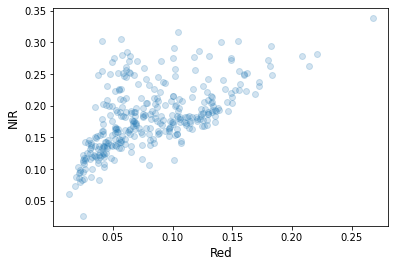

In [7]:
# Import libraries.
import ee
import matplotlib.pyplot as plt

# # Trigger the authentication flow.
# ee.Authenticate()

# # Initialize the Earth Engine module.
# ee.Initialize()

# Fetch a Landsat image.
img = ee.Image('LANDSAT/LT05/C01/T1_SR/LT05_034033_20000913')

# Select Red and NIR bands, scale them, and sample 500 points.
samp_fc = img.select(['B3','B4']).divide(10000).sample(scale=30, numPixels=500)

# Arrange the sample as a list of lists.
samp_dict = samp_fc.reduceColumns(ee.Reducer.toList().repeat(2), ['B3', 'B4'])
samp_list = ee.List(samp_dict.get('list'))

# Save server-side ee.List as a client-side Python list.
samp_data = samp_list.getInfo()

# Display a scatter plot of Red-NIR sample pairs using matplotlib.
plt.scatter(samp_data[0], samp_data[1], alpha=0.2)
plt.xlabel('Red', fontsize=12)
plt.ylabel('NIR', fontsize=12)
plt.show()